In [18]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

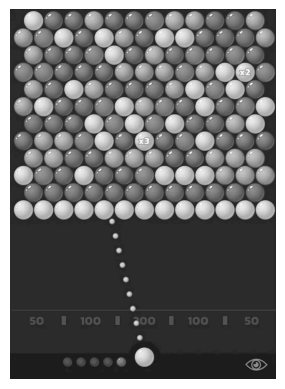

In [19]:
# Carga la imagen
ballscol = cv2.imread('../../IMAGES/practica2.1_kmeans_2.png', 1)
ballsc = cv2.cvtColor(ballscol, cv2.COLOR_BGR2RGB)

balls = cv2.imread('../../IMAGES/practica2.1_kmeans_2.png', 0)

plt.axis("off")
plt.imshow(balls, cmap='gray')

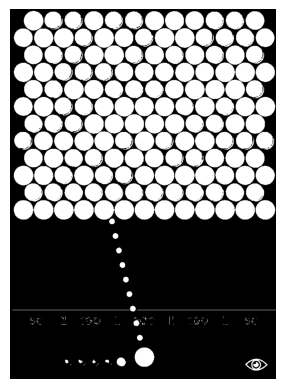

In [20]:
# Binarizacion
_, imgBin = cv2.threshold(balls, 84, 255, cv2.THRESH_BINARY)

plt.axis("off")
plt.imshow(imgBin, cmap='gray')

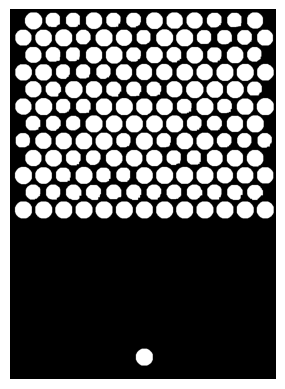

In [21]:
kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(imgBin, kernel, iterations=4)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=3)


plt.axis("off")
plt.imshow(img_dilation, cmap='gray')

(963, 693, 3)


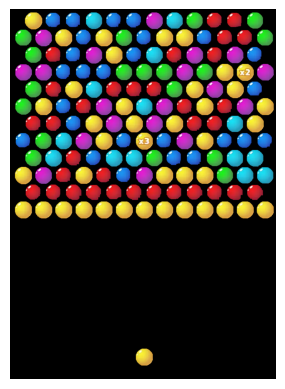

In [22]:
cv2.imwrite("../../IMAGES/piv.jpg", img_dilation)
img_dilation2 = cv2.imread('../../IMAGES/piv.jpg', 1)

masked3 = cv2.bitwise_and(img_dilation2, ballsc)

print(masked3.shape)

plt.axis("off")
plt.imshow(masked3, cmap='gray')

(192, 138, 3)


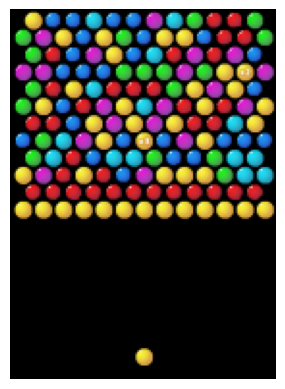

In [23]:
escala = 20

alto = int(masked3.shape[0]*escala/100)
ancho = int(masked3.shape[1]*escala/100)

newdim = (ancho,alto)

new = cv2.resize(masked3, newdim, interpolation=cv2.INTER_AREA)

print(new.shape)

plt.axis("off")
plt.imshow(new, cmap='gray')

#masked3 = np.copy(new)

In [48]:
# Funcion para calcular la distancia entre los pixeles mas cercanos a un color
def distanciaColor(pixelr, r, pixelg, g, pixelb, b):
    return np.sqrt((pixelr - r) * 2 + (pixelg - g) * 2 + (pixelb - b) ** 2)


# Funcion para obtener los pixeles mas cercanos a un color
def getUsefulPixel(red, green, blue, color, accepted):
    
    dim = red.shape # Tamaño de la imagen vectorizada
    filteredImage = np.zeros(dim, dtype=np.uint8) # Nuevo vector

    # Utilizar divide y vencerás
    def divide_and_conquer(start, end):
        if start >= end:
            distance = distanciaColor(color[2], red[start], color[1], green[start], color[0], blue[start])
            if distance < accepted:
                filteredImage[start] = 255
        else:
            mid = (start + end) // 2
            divide_and_conquer(start, mid)
            divide_and_conquer(mid + 1, end)

    divide_and_conquer(0, len(red) - 1)
    
    return filteredImage

#Funcion que obtiene los frames con el color deseado
def findColor(image, color, accepted):
    
    # Tamaño de la imagen
    wid, hght, canal = image.shape 
    
    # Recuperar canales
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    # Vectorizar cada canal
    redV = red_channel.flatten()
    greenV = green_channel.flatten()
    blueV = blue_channel.flatten()

    # Pasar los canales vectorizados a la funcion
    filteredImage = getUsefulPixel(redV, greenV, blueV, color, accepted) # Obtener el vector
    filteredImage = np.reshape(filteredImage, (wid, hght))

    return filteredImage

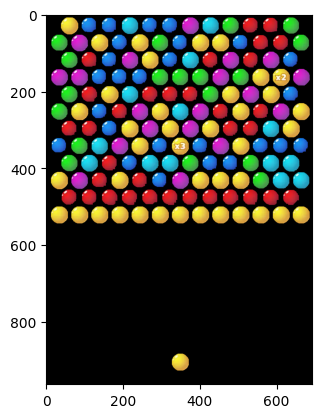

In [49]:
plt.imshow(masked3, cmap='gray')

C:\Users\HP\AppData\Local\Temp\ipykernel_11908\1815753451.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((pixelr - r) * 2 + (pixelg - g) * 2 + (pixelb - b) ** 2)


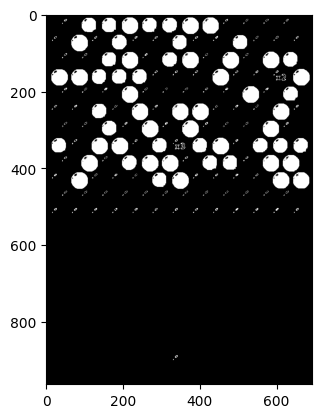

In [53]:
# Color al que queremos aproximar
colorDetected = np.array([236, 205, 68])
# Rango de color aceptado
acceptedColor = 100

filteredImage = findColor(masked3, colorDetected, acceptedColor)
plt.imshow(filteredImage, cmap= 'gray')

In [27]:
# Separar las imagenes en 3 canales
B, G, R = cv2.split(masked3)

# Convertir cada canal en arreglo
ArrayR = np.asarray(R)
ArrayG = np.asarray(G)
ArrayB = np.asarray(B)


vectorR = ArrayR.flatten()

vectorG = ArrayG.flatten()

vectorB = ArrayB.flatten()


print(vectorR)
print(vectorR.shape)

[0 0 0 ... 0 0 0]
(667359,)
